<a href="https://colab.research.google.com/github/nmningmei/NMA-2021-behavioral-IBL/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nmningmei/NMA-2021-behavioral-IBL

Cloning into 'NMA-2021-behavioral-IBL'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 67 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), done.


In [2]:
import re
import numpy as np
from glob import glob
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')
from matplotlib import pyplot as plt

In [3]:
stats = []
for filename in glob("/content/NMA-2021-behavioral-IBL/stats*csv"):
 df_temp = pd.read_csv(filename)
 stats.append(df_temp)
stats = pd.concat(stats)
stats 

,Unnamed: 0,mean,std,2.5q,25q,50q,75q,97.5q,mc err
0,a,3.695842,0.478108,2.726983,3.399124,3.691808,4.023998,4.560900,0.037710
1,a_std,1.078015,0.244982,0.681247,0.898586,1.045058,1.221050,1.639937,0.015410
2,a_subj.36,5.625879,1.366036,2.577349,4.996077,5.857975,6.706152,7.482334,0.139131
3,a_subj.38,3.681503,0.501007,2.713919,3.306922,3.665736,4.074537,4.657285,0.047294
4,a_subj.40,3.331562,0.323968,2.661292,3.152888,3.344123,3.550422,3.912611,0.033097
...,...,...,...,...,...,...,...,...,...
335,z_subj.86,0.800153,0.017032,0.765504,0.789464,0.802126,0.812057,0.829007,0.001625
336,z_subj.88,0.688924,0.094542,0.476478,0.604136,0.733861,0.768967,0.786532,0.009579
337,z_subj.94,0.870964,0.025401,0.787957,0.867854,0.877561,0.884605,0.897681,0.002601
338,z_subj.98,0.762430,0.041276,0.660224,0.737257,0.775487,0.792986,0.816262,0.004135


In [4]:
stats.rename(columns = {'Unnamed: 0':'parameters'}, inplace = True)

In [5]:
idx_pick = stats['parameters'].apply(lambda x:'subj' in x)
stats_picked = stats[idx_pick]
stats_picked['subject'] = stats_picked['parameters'].apply(lambda x: int(x.split('.')[-1]))
stats_picked['parameter_name'] = stats_picked['parameters'].apply(lambda x: x.split('_')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
unique_id = pd.unique(stats_picked['subject'])

In [7]:
pd.unique(stats_picked['parameter_name'])

array(['a', 'v', 't', 'z'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

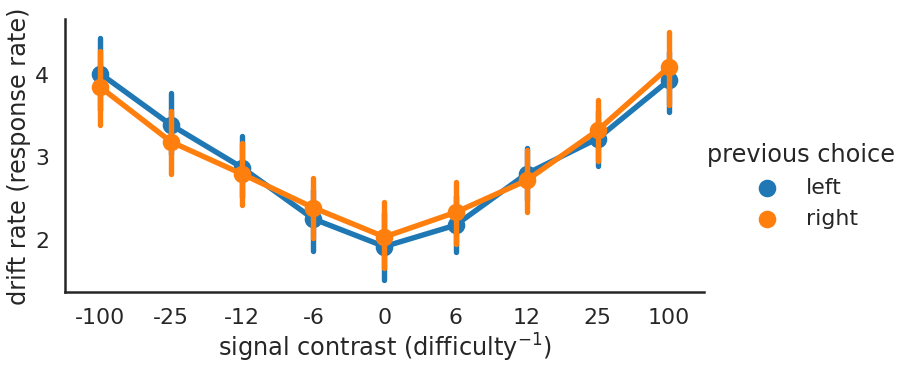

In [8]:
df_plot = stats_picked[stats_picked['parameter_name']== 'v']
df_plot['temp'] = df_plot['parameters'].apply(lambda x: re.findall('\(([^)]+)',x)[0])
df_plot['signed_contrast'] = df_plot['temp'].apply(lambda x : int(x.split('.')[1]))
df_plot['previous choice'] = df_plot['temp'].apply(lambda x : x.split('.')[0])
g = sns.catplot(x = 'signed_contrast',
                y = 'mean',
                hue = 'previous choice',
                data = df_plot,
                kind = 'point',
                aspect = 2,
                dogde = True,)
g.set( 
    xlabel = 'signal contrast (difficulty$^{-1}$)',
    ylabel = 'drift rate (response rate)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


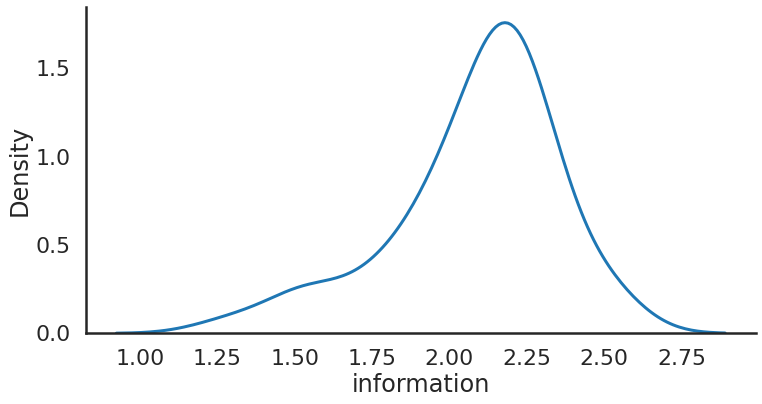

In [9]:
df_plot = stats_picked[stats_picked['parameter_name']== 'a']
df_plot['information'] = df_plot['mean'].apply(np.log2)
fig,ax = plt.subplots(figsize = (12,6))
ax = sns.kdeplot(df_plot['information'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


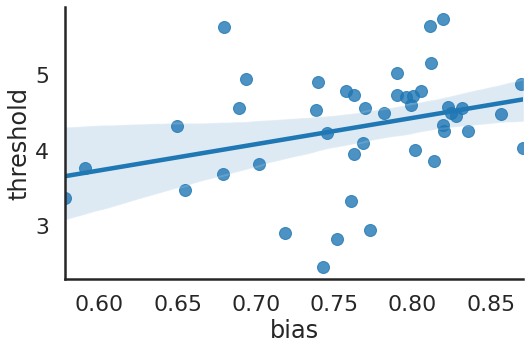

In [10]:
a = stats_picked[stats_picked['parameter_name']== 'a']
a['information'] = a['mean'].apply(np.log2)
z = stats_picked[stats_picked['parameter_name']== 'z']
z['information'] = z['mean'].apply(np.log2)
df_plot = pd.DataFrame(dict(a=a['mean'].values,z=z['mean'].values))
g = sns.lmplot(x = "z",y = "a", data = df_plot, aspect = 1.5)
g.set(xlabel = 'bias', ylabel = 'threshold')
ax = g.axes.flatten()[0]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [11]:
df = pd.read_csv('/content/NMA-2021-behavioral-IBL/traini_contrast_not_50.csv')
df 


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,session_start_time,trial_id,trial_response_time,trial_response_choice,trial_stim_on_time,trial_stim_contrast_left,trial_stim_contrast_right,trial_feedback_type,probabilityLeft,subject_nickname,institution_short,signed_contrast,trial,choice,correct,choice_right,choice2,correct_easy,rt,previous_choice,previous_outcome,previous_contrast,previous_choice_name,previous_outcome_name,repeat,task,contrast,stimulus_side
0,2/8/2019 15:20:12,1,0.828800,CW,0.5651,0.0000,0.00,-1,50,ZM_1084,CCU,0.00,1,-1,,0,0,,.2637,1,1,25.00,right,post_correct,False,traini,0.00,0
1,2/8/2019 15:20:12,2,4.546700,CCW,4.465,0.0000,0.25,1,50,ZM_1084,CCU,25.00,2,1,1,1,1,,.0817000000000005,-1,-1,0.00,left,post_error,False,traini,25.00,1
2,2/8/2019 15:20:12,3,8.172100,CCW,7.7153,0.0625,0.00,-1,50,ZM_1084,CCU,-6.25,3,1,0,1,1,,.456799999999999,1,1,25.00,right,post_correct,True,traini,6.25,-1
3,2/8/2019 15:20:12,4,12.716900,CW,12.2153,0.0000,0.00,1,50,ZM_1084,CCU,0.00,4,-1,,0,0,,.5016,1,-1,6.25,right,post_error,False,traini,0.00,0
4,2/8/2019 15:20:12,5,14.730800,CW,14.4819,0.1250,0.00,1,50,ZM_1084,CCU,-12.50,5,-1,1,0,0,,.248899999999999,-1,1,0.00,left,post_correct,True,traini,12.50,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129479,3/6/2020 14:03:09,1102,5359.535798,CCW,5359.211998,0.1250,0.00,-1,50,ibl_witten_19,Princeton,-12.50,1102,1,0,1,1,,.323800000000119,-1,1,100.00,left,post_correct,False,traini,12.50,-1
129480,3/6/2020 14:03:09,1103,5365.537198,CW,5364.111798,0.1250,0.00,1,80,ibl_witten_19,Princeton,-12.50,1103,-1,1,0,0,,1.42540000000008,1,-1,12.50,right,post_error,False,traini,12.50,-1
129481,3/6/2020 14:03:09,1104,5369.525698,CCW,5369.195098,0.0000,1.00,1,50,ibl_witten_19,Princeton,100.00,1104,1,1,1,1,1,.330599999999322,-1,1,12.50,left,post_correct,False,traini,100.00,1
129482,3/6/2020 14:03:09,1105,5374.319098,CW,5374.020498,0.2500,0.00,1,50,ibl_witten_19,Princeton,-25.00,1105,-1,1,0,0,,.298600000000079,1,1,100.00,right,post_correct,False,traini,25.00,-1


In [12]:
!pip install --quiet nma-ibl
import datajoint as dj
dj.config['database.host'] = 'datajoint-public.internationalbrainlab.org'
dj.config['database.user'] = 'nma-ibl-public'
dj.config['database.password'] = 'ibl.pipeline.public.demo'
from nma_ibl import reference, subject, action, acquisition, data, behavior, behavior_analyses
df_nickname = subject.Subject.proj('subject_nickname').fetch(format = 'frame').reset_index()
df_nickname.head()

     |████████████████████████████████| 95 kB 3.7 MB/s 
     |████████████████████████████████| 3.2 MB 26.7 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 2.6 MB 29.8 MB/s 
Connecting nma-ibl-public@datajoint-public.internationalbrainlab.org:3306


,subject_uuid,subject_nickname
0,00778394-c956-408d-8a6c-ca3b05a611d5,KS019
1,019a22c1-b944-4494-9e38-0e45ae6697bf,SWC_022
2,01be78e7-8741-4b40-bd64-79ed745431b5,CSHL057
3,02120449-9b19-4276-a434-513886c2fb19,ibl_witten_07
4,030f3e05-9db0-46ba-a6ce-4274ff09b39e,KS031


In [13]:
df_behav = []
for idx in unique_id:
    df_temp = df[df['subject_nickname']==  df_nickname.loc[idx,'subject_nickname']]
    df_behav.append(df_temp)
df_behav = pd.concat(df_behav)

In [14]:
print(df_behav.shape)
df_behav['rt'] = pd.to_numeric(df_behav['rt'],errors='coerce')
print(df_behav.shape)

(67941, 28)
(67941, 28)


In [15]:
df_behav['previous_choice_name'] = df_behav['previous_choice_name'].map({'left':'CCW','right':'CW'})

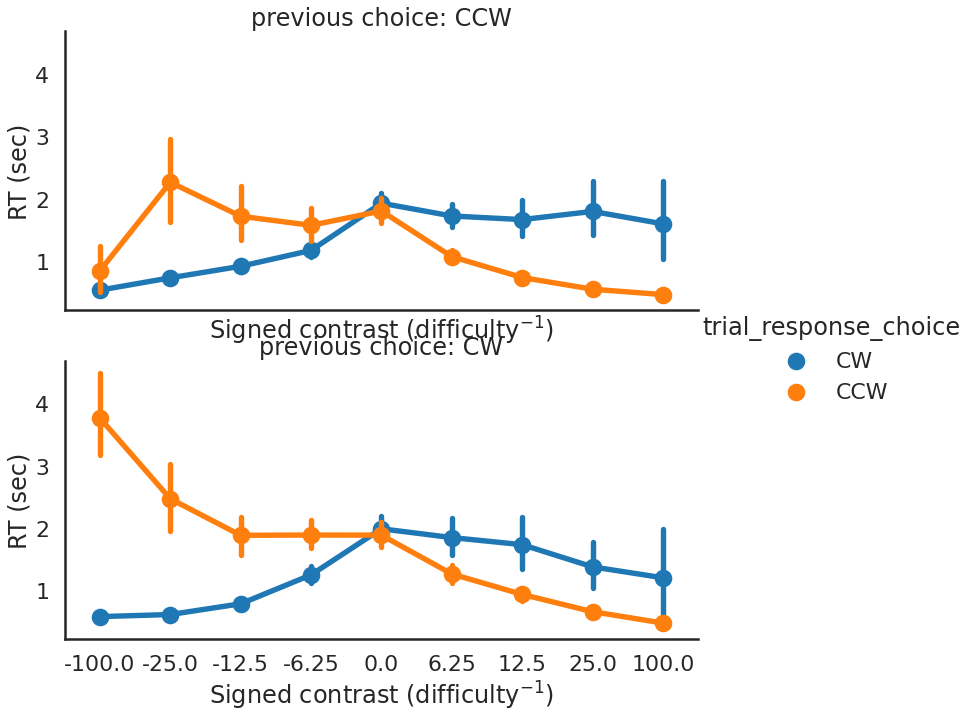

In [18]:
g = sns.catplot(x = 'signed_contrast',
                y = 'rt',
                hue = 'trial_response_choice',
                hue_order = ['CW', 'CCW'],
                data = df_behav,
                kind = 'point',
                aspect = 2,
                row = 'previous_choice_name',
                )
(g.set_titles('previous choice: {row_name}')
  .set(xlabel = 'Signed contrast (difficulty$^{-1}$)',
       ylabel = 'RT (sec)'))